### About the Dataset


This dataset contains an airline passenger satisfaction survey. Predicting overall passenger satisfaction from bottom features.

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Importing proper headerfiles

In [ ]:
### Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ML Libraries:
## Preprocessing:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest,  chi2, f_classif, f_regression, mutual_info_regression
from sklearn.decomposition import PCA   ### dimensionality reduction

## Models:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Pipeline
from sklearn.pipeline import Pipeline

## Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Evalution:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc, confusion_matrix, classification_report

## Oversampling:
from imblearn.over_sampling import SMOTE

import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier

## To save the final model:
import joblib

In [ ]:
!pip install lightgbm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**General Steps to follow::**

1. Define the problem: Clearly articulate the problem you want to solve using machine learning. Identify whether it is a classification, regression, clustering, or other types of tasks.

2. Preprocessing: Handle missing values, outliers, formatting, Label Encoding/One hot encoding

Feature Removal:
- Simple Correlation

3. Split the data: train_test_split

4. Feature Selection:
- Feature importance from tree-based models
- Feature selection --> statistical methods using SelectKBest
- Principal Component Analysis (PCA)

5. Choose candidate algorithms: Baseline models

6. Initial training and evaluation: Train each candidate algorithm on the training set and evaluate its performance on the testing set using appropriate metrics (e.g., accuracy, F1-score, mean squared error, etc.).

7. Hyperparameter tuning: Grid Search/ Randomised Search

8. Model comparison: Compare the performance of each algorithm based on the evaluation metrics. Consider factors such as accuracy, interpretability, training time, and ease of implementation.

9. Fine-tuning: If necessary, fine-tune the top-performing algorithms by making further adjustments to hyperparameters or exploring different feature sets.

10. Ensemble methods: bagging, boosting, or stacking

11. Final evaluation: Evaluate the top-performing models using k-fold cross-validation to obtain a more robust estimate of their performance.

12. Select the best algorithm: Based on the evaluation results, choose the algorithm that performs the best on the validation set or cross-validation.

13. Test on unseen data: Once you have selected the best algorithm, test it on completely unseen data to ensure its generalization to new samples.

### Summarising and Preprocessing the data:

In [ ]:
### import the data set and test set
df=pd.read_csv("/content/drive/MyDrive/Data_Projects/train.csv")
df.head()

test = pd.read_csv('/content/drive/MyDrive/Data_Projects/test.csv')
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.shape

(103904, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
### checking missing values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
df['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

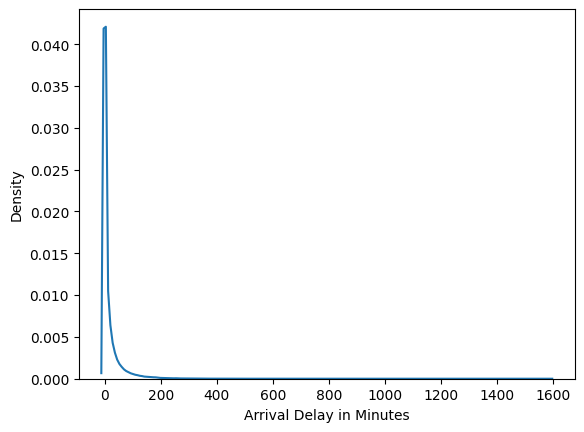

In [ ]:
sns.kdeplot(df['Arrival Delay in Minutes'])
plt.show()

In [ ]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
df['Arrival Delay in Minutes'].mode()

0    0.0
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df.id.nunique()

103904

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
test.dropna(inplace=True)

In [ ]:
df.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)

In [ ]:
test.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103594.0,39.380466,15.113125,7.0,27.0,40.0,51.0,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.0,3.0,4.0,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.0,3.0,4.0,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.0,3.0,4.0,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.0,3.0,4.0,5.0
Seat comfort,103594.0,3.439765,1.318896,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103594.0,3.358341,1.333030,0.0,2.0,4.0,4.0,5.0


### Feature Removal

<ipython-input-82-a253ad0dd945>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


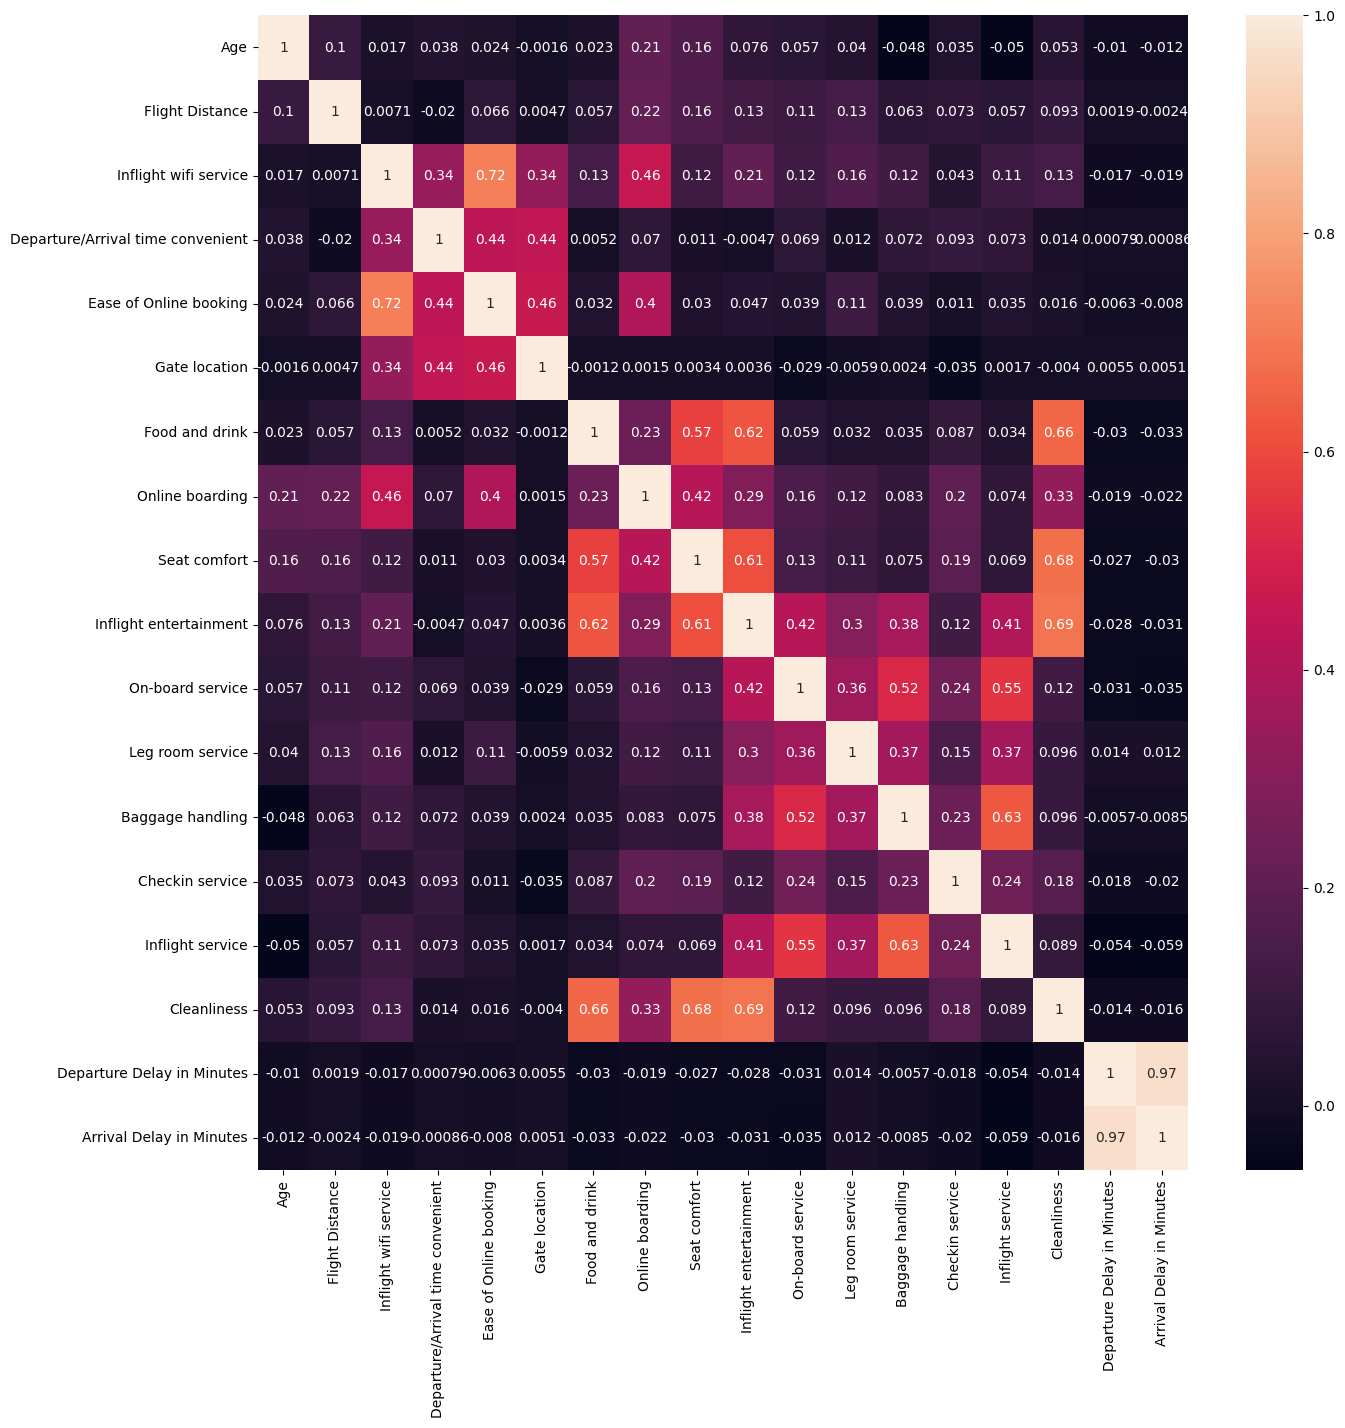

In [ ]:
### checking for Collinearity:::
corr_matrix=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True, )
plt.show()

### Encoding and splitting:

In [ ]:
### Filtering the categorical varibles

cat_col = df.select_dtypes(include=['object']).columns

print(cat_col)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [ ]:
### Label Encoding Gender, Customer Type, Type of travel, Satisfaction

for i in cat_col:
  if i != 'Class':
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    test[i] = le.fit_transform(test[i])

In [ ]:
### Onehot encoding for Class

df = pd.get_dummies(df, columns = ['Class'])
test = pd.get_dummies(test, columns = ['Class'])

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,192,2,1,2,3,2,...,4,2,3,2,3,0.0,0,0,1,0
103900,1,0,49,0,2347,4,4,4,4,2,...,5,5,5,4,0,0.0,1,1,0,0
103901,1,1,30,0,1995,1,1,1,3,4,...,4,5,5,4,7,14.0,0,1,0,0
103902,0,1,22,0,1000,1,1,1,5,1,...,1,5,4,1,0,0.0,0,0,1,0


In [ ]:
test

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,0,0,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
2,1,1,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0,1,0
3,1,0,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1,0,0
4,0,0,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,526,3,3,3,1,4,...,4,4,5,4,0,0.0,0,1,0,0
25972,1,0,23,0,646,4,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
25973,0,0,17,1,828,2,5,1,5,2,...,4,5,4,2,0,0.0,0,0,1,0
25974,1,0,14,0,1127,3,3,3,3,4,...,5,4,5,4,0,0.0,1,1,0,0


In [ ]:
### Split the data::
X_train=df[[i for i in df.columns if i!='satisfaction']]
y_train=df['satisfaction']

X_test=test[[i for i in test.columns if i!='satisfaction']]
y_test=test['satisfaction']


### Scaling:

In [ ]:
### Standard Scaling for the features::
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.01515429, -0.47288331, -1.7455419 , ..., -0.95720571,
        -0.90410548,  3.58771785],
       [ 1.01515429,  2.1146866 , -0.95152625, ...,  1.04470752,
        -0.90410548, -0.27872872],
       [-0.98507193, -0.47288331, -0.88535828, ...,  1.04470752,
        -0.90410548, -0.27872872],
       ...,
       [ 1.01515429,  2.1146866 , -0.6206864 , ...,  1.04470752,
        -0.90410548, -0.27872872],
       [-0.98507193,  2.1146866 , -1.15003016, ..., -0.95720571,
         1.10606564, -0.27872872],
       [ 1.01515429, -0.47288331, -0.81919031, ...,  1.04470752,
        -0.90410548, -0.27872872]])

### Base line Modelling


In [ ]:
### Baseline modelling for trianing set
%%time
model=[LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), RidgeClassifier(), Lasso(), KNeighborsClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_train,y_train,cv=10,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

CPU times: user 2min 51s, sys: 2.48 s, total: 2min 53s
Wall time: 2min 30s


In [ ]:
dict_model_results

{'LogisticRegression()': 0.8749252342823152,
 'DecisionTreeClassifier()': 0.9458076715787401,
 'RandomForestClassifier()': 0.961773861797754,
 'RidgeClassifier()': 0.8720679358146777,
 'Lasso()': nan,
 'KNeighborsClassifier()': 0.9273413648848055}

### Evaluating best baseline model

In [ ]:
### Training the model using Randomforest for training set

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
### Predicting with the test set

y_pred = model.predict(X_test)


In [ ]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.961457,0.972215,0.939023,0.955331,0.959015


### Hyper Parameter tuning of the best baseline model

In [ ]:
### We perform RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required to split a node
min_samples_split = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

rf_Model = RandomForestClassifier()

rf_Random = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

rf_Random.fit(X_train, y_train)

rf_Random.best_params_

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'n_estimators': 90,
 'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
### Training the model using Randomforest after tuning the parameters

model = RandomForestClassifier(**rf_Random.best_params_)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                       min_samples_leaf=8, min_samples_split=9,
                       n_estimators=90)

In [ ]:
### Predicting with the test set

y_pred = model.predict(X_test)

In [ ]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.942262,0.94165,0.925825,0.933671,0.940473


### Checking with other ensemble models

In [ ]:
### for the training set data
%%time
model=[XGBClassifier(), LGBMClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_train,y_train,cv=5,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

dict_model_results

CPU times: user 1min 26s, sys: 254 ms, total: 1min 26s
Wall time: 50.3 s


{'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, ...)': 0.9633086984906326,
 'LGBMClassifier()': 0.9636562116666901}

### Hyper parameter tuning for LGBM method

In [ ]:
from numpy.random.mtrand import random
### Performing RandomizedSearchCv

# Create a LightGBM classifier
lgb_model = LGBMClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(lgb_model, param_grid, cv=5)

# Fit the grid search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fractio

In [ ]:
best_params

{'reg_lambda': 0.1,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'min_child_samples': 20,
 'max_depth': 5,
 'learning_rate': 0.2,
 'feature_fraction': 0.6,
 'bagging_fraction': 0.5}

In [ ]:
### Training the model with these hyper parameters

### Training the model using Randomforest after tuning the parameters

model = LGBMClassifier(**best_params)
model.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.5, feature_fraction=0.6, learning_rate=0.2,
               max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['LightBGM Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,LightBGM Tuned,0.962693,0.971268,0.942895,0.956871,0.960537


### Evaluation of the best model


In [ ]:
### Training the model using Randomforest without tuning the parameters

modelRF = RandomForestClassifier()
modelRF.fit(X_train,y_train)

### Predicting with the test set

y_pred = modelRF.predict(X_test)

### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(model_results)

filename = '/content/drive/MyDrive/Data_Projects/Airplane_baseline.sav'
joblib.dump(modelRF, filename)

                 Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Random Forest Tuned  0.962036   0.971309  0.941311  0.956075  0.95978


['/content/drive/MyDrive/Data_Projects/Airplane_baseline.sav']

In [ ]:
### LightBGM

modelLGBM = LGBMClassifier()
modelLGBM.fit(X_train,y_train)

y_pred = modelLGBM.predict(X_test)

### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(model_results)

filename = '/content/drive/MyDrive/Data_Projects/Airplane_ensemble.sav'
joblib.dump(modelLGBM, filename)

                 Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Random Forest Tuned  0.963658   0.973818  0.942543  0.957925  0.96136


['/content/drive/MyDrive/Data_Projects/Airplane_ensemble.sav']

### Plotting final curves

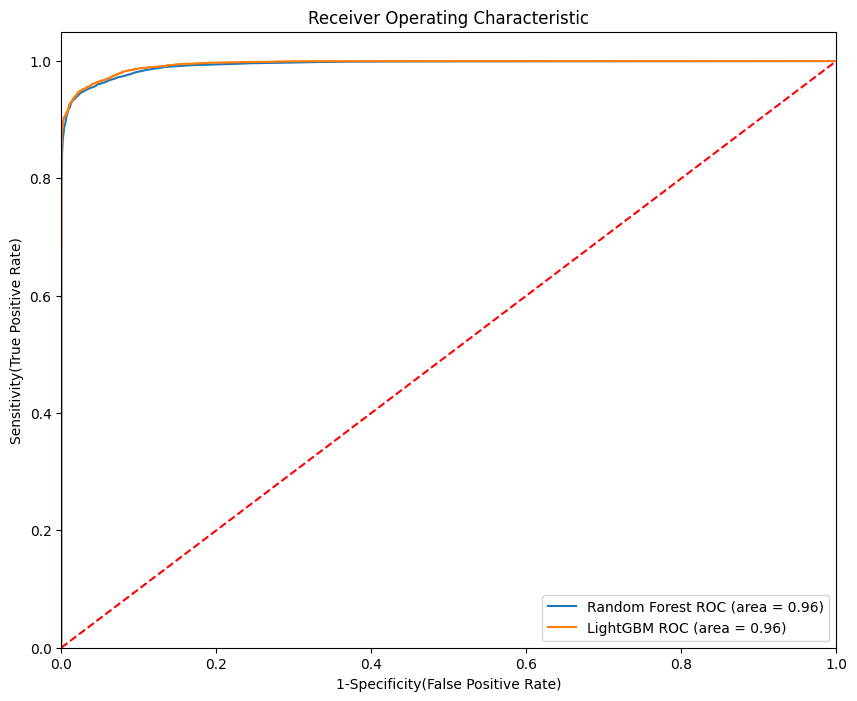

In [145]:
filename1 = '/content/drive/MyDrive/Data_Projects/Airplane_baseline.sav'
loaded_model_baseline = joblib.load(filename1)

filename2 = '/content/drive/MyDrive/Data_Projects/Airplane_ensemble.sav'
loaded_model_ensemble = joblib.load(filename2)

y_pred_baseline =loaded_model_baseline.predict_proba(X_test)[:,1]
y_pred_ensemble =loaded_model_ensemble.predict_proba(X_test)[:,1]


model = [loaded_model_baseline, loaded_model_ensemble]

models=[y_pred_baseline,y_pred_ensemble]
label=['Random Forest', 'LightGBM']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(2)
for m in m:
    fpr, tpr,thresholds= roc_curve(y_test,models[m])
    auc = roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [146]:
### confusion matrix
y_pred_baseline = loaded_model_baseline.predict(X_test)
y_pred_ensemble = loaded_model_ensemble.predict(X_test)

<Axes: >

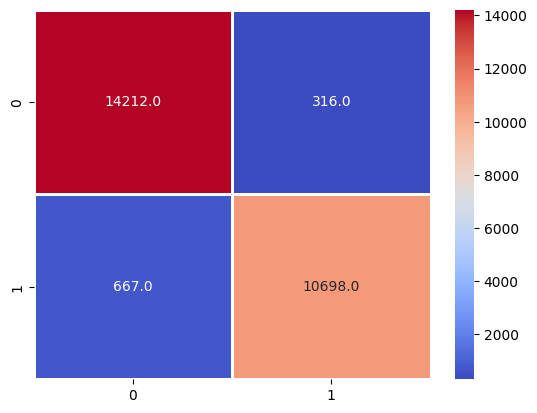

In [147]:
cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm', fmt=".1f")

<Axes: >

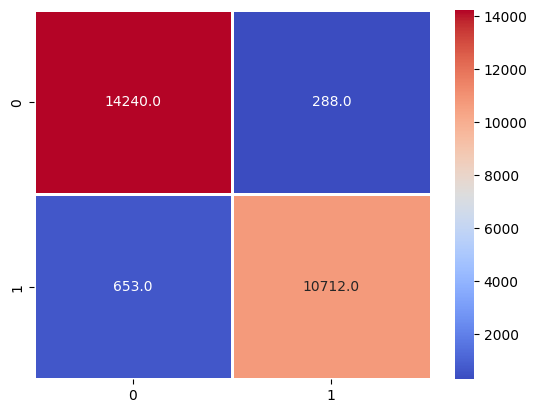

In [148]:
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm', fmt=".1f")

In [149]:
### Classification report for both models

print(classification_report(y_test, y_pred_ensemble, digits=4))
print(classification_report(y_test, y_pred_baseline, digits=4))

              precision    recall  f1-score   support

           0     0.9562    0.9802    0.9680     14528
           1     0.9738    0.9425    0.9579     11365

    accuracy                         0.9637     25893
   macro avg     0.9650    0.9614    0.9630     25893
weighted avg     0.9639    0.9637    0.9636     25893

              precision    recall  f1-score   support

           0     0.9552    0.9782    0.9666     14528
           1     0.9713    0.9413    0.9561     11365

    accuracy                         0.9620     25893
   macro avg     0.9632    0.9598    0.9613     25893
weighted avg     0.9623    0.9620    0.9620     25893

